# Titanic Verisini inceleyelim

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn; seaborn.set() # set plot style

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Sorular

####  [1]  `train.info()` çıktısında 
 - 891
 - 714
 - 204
 - object
 - 12 columns
 
ne anlama geliyor 

####  [2]  Kurtulan ve kaybedilen insan sayısı?

In [7]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

####  [3] Kurtulanların ayırt edici özellikleri neler?

In [8]:
train.groupby(['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [9]:
train.groupby(['Survived', 'Sex']).mean()

PassengerId    Pclass        Age     SibSp     Parch  \
Survived Sex                                                            
0        female   434.851852  2.851852  25.046875  1.209877  1.037037   
         male     449.121795  2.476496  31.618056  0.440171  0.207265   
1        female   429.699571  1.918455  28.847716  0.515021  0.515021   
         male     475.724771  2.018349  27.276022  0.385321  0.357798   

                      Fare  
Survived Sex                
0        female  23.024385  
         male    21.960993  
1        female  51.938573  
         male    40.821484

In [10]:
train.groupby(['Survived', 'Sex']).aggregate(['min', np.median, max])

PassengerId             Pclass              Age               \
                        min median  max    min median max   min median   max   
Survived Sex                                                                   
0        female          15    420  889      1      3   3  2.00   24.5  57.0   
         male             1    461  891      1      3   3  1.00   29.0  74.0   
1        female           2    400  888      1      2   3  0.75   28.0  63.0   
         male            18    508  890      1      2   3  0.42   28.0  80.0   

                SibSp            Parch              Fare                      
                  min median max   min median max    min    median       max  
Survived Sex                                                                  
0        female     0      1   8     0      0   6  6.750  15.24580  151.5500  
         male       0      0   8     0      0   5  0.000   9.41665  263.0000  
1        female     0      0   4     0      0   5  7.225  26.00000  512.3292  
         male       0      0   4     0      0   2  0.000  26.28750  512.3292

In [11]:
train.groupby(['Survived', 'Sex']).aggregate(['min', np.median, max, len])['Age']

min  median   max    len
Survived Sex                              
0        female  2.00    24.5  57.0   81.0
         male    1.00    29.0  74.0  468.0
1        female  0.75    28.0  63.0  233.0
         male    0.42    28.0  80.0  109.0

In [12]:
train.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [13]:
train.groupby(['Survived', 'Sex']).transform(lambda x: x - x.mean()).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-448.121795,0.523504,-9.618056,0.559829,-0.207265,-14.710993
1,-427.699571,-0.918455,9.152284,0.484979,-0.515021,19.344727
2,-426.699571,1.081545,-2.847716,-0.515021,-0.515021,-44.013573
3,-425.699571,-0.918455,6.152284,0.484979,-0.515021,1.161427
4,-444.121795,0.523504,3.381944,-0.440171,-0.207265,-13.910993


In [14]:
train.groupby(['Survived', 'Sex']).min()

Age   Fare                                            Name  \
Survived Sex                                                                   
0        female  2.00  6.750  Ahlin, Mrs. Johan (Johanna Persdotter Larsson)   
         male    1.00  0.000                             Abbing, Mr. Anthony   
1        female  0.75  7.225                Abbott, Mrs. Stanton (Rosa Hunt)   
         male    0.42  0.000                     Albimona, Mr. Nassef Cassem   

                 Parch  PassengerId  Pclass  SibSp  Ticket  
Survived Sex                                                
0        female      0           15       1      0  113781  
         male        0            1       1      0  110413  
1        female      0            2       1      0  110152  
         male        0           18       1      0  110564

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


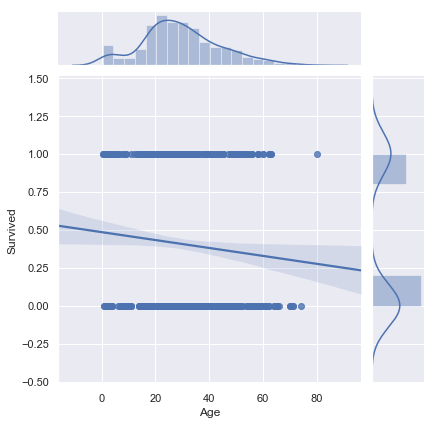

In [15]:
sns.jointplot(x="Age", y="Survived", data=train, kind="reg");

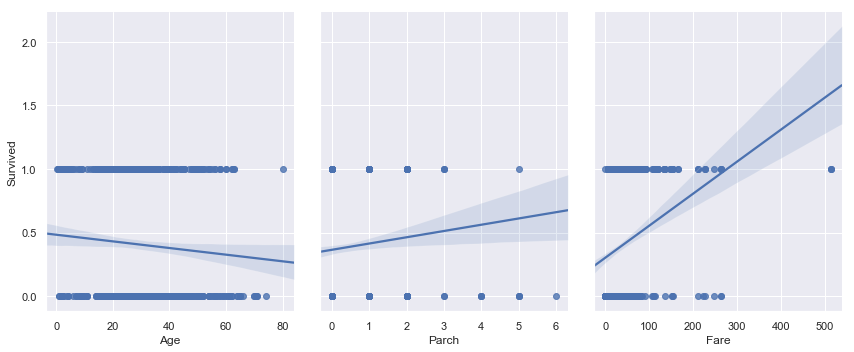

In [16]:
sns.pairplot(x_vars=["Age", "Parch", "Fare"], y_vars=["Survived"], 
             data=train, height=5, aspect=.8, kind="reg");

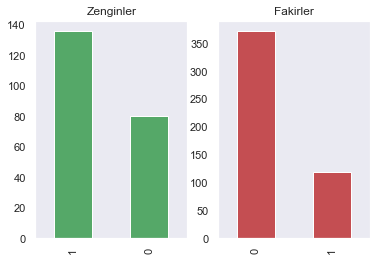

In [17]:
fakir_indis, zengin_indis = train.Pclass == 3, train.Pclass == 1

plt.subplot(1, 2, 1)
train[zengin_indis].Survived.value_counts().plot(kind = 'bar', color = 'g')
plt.title("Zenginler")
plt.grid()

plt.subplot(1, 2, 2)
train[fakir_indis].Survived.value_counts().plot(kind = 'bar', color = 'r')
plt.title("Fakirler")
plt.grid()

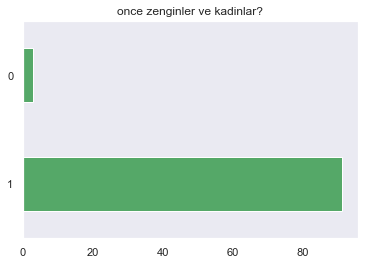

In [18]:
# once zenginler ve kadinlar?
train[(train.Pclass == 1) & (train.Sex == 'female')].Survived.value_counts().plot(kind = 'barh', color = 'g')
plt.title("once zenginler ve kadinlar?")
plt.grid()

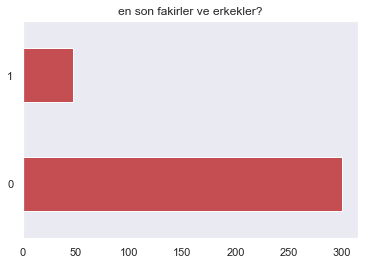

In [19]:
# en son fakirler ve erkekler?
train[(train.Pclass == 3) & (train.Sex == 'male')].Survived.value_counts().plot(kind = 'barh', color = 'r')
plt.title("en son fakirler ve erkekler?")
plt.grid()

In [20]:
def sayisallastir(x):
    if x == 'male' : return 1
    else: return 0

train.Sex = train.Sex.apply(sayisallastir)
train.Sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [21]:
train[train.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q


In [22]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
train['Fare'] = train['Fare'].fillna(np.mean(train['Fare']))

In [24]:
# nitelik secimi

In [25]:
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

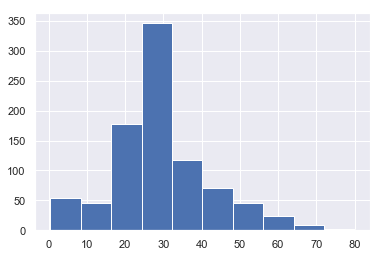

In [26]:
plt.hist(train['Age'])

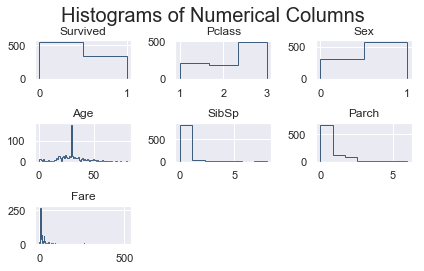

In [27]:
dataset2 = train
## Histograms
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, histtype='step', color='#3F5D7D')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

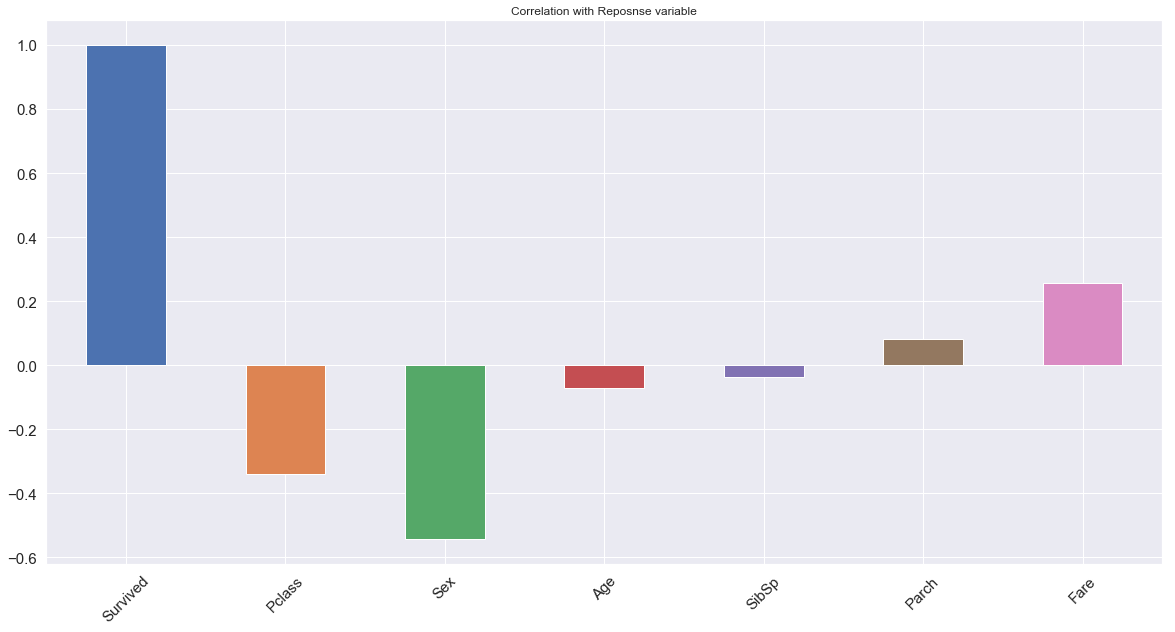

In [28]:
## Correlation with Response Variable
dataset2.corrwith(dataset2.Survived).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)


# Data Preperation

In [29]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [30]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250


In [31]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [34]:
#X = X.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
#X.head(3)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int64
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [36]:
X = pd.get_dummies(X)
X.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000


In [38]:
#X.drop(columns = ['Sex_male'], inplace = True)
#X.head(4)

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [40]:
X[:4,:]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  0.    , 35.    ,  1.    ,  0.    , 53.1   ]])

# Model Kurma: Lojistik Regresyon

In [41]:
#X = train.drop('Survived', axis = 1)
#y = train['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#import logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
print('train Dogrulugu:' , accuracy_score(y_train, lr.predict(X_train)))
print('test Dogrulugu:', accuracy_score(y_test, lr.predict(X_test)))

print("Confusion Metrices: \n {0}".format(confusion_matrix(y_test, lr.predict(X_test))))

train Dogrulugu: 0.7969798657718121
test Dogrulugu: 0.8067796610169492
Confusion Metrices: 
 [[154  21]
 [ 36  84]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
lr.coef_

array([[-0.62435453, -2.34648146, -0.01975233, -0.27078799, -0.11671272,
         0.00623911]])

In [43]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Weight"] = pd.Series(lr.coef_[0])

coeff_df = coeff_df.sort_values(by='Weight', ascending=False)
coeff_df

,Feature,Weight
5,Fare,0.006239
2,Age,-0.019752
4,Parch,-0.116713
3,SibSp,-0.270788
0,Pclass,-0.624355
1,Sex,-2.346481


<BarContainer object of 6 artists>

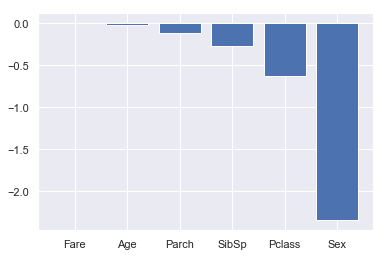

In [44]:
plt.bar(coeff_df.Feature, coeff_df.Weight)

In [45]:
coeff_df.set_index('Feature')

,Weight
Feature,
Fare,0.006239
Age,-0.019752
Parch,-0.116713
SibSp,-0.270788
Pclass,-0.624355
Sex,-2.346481


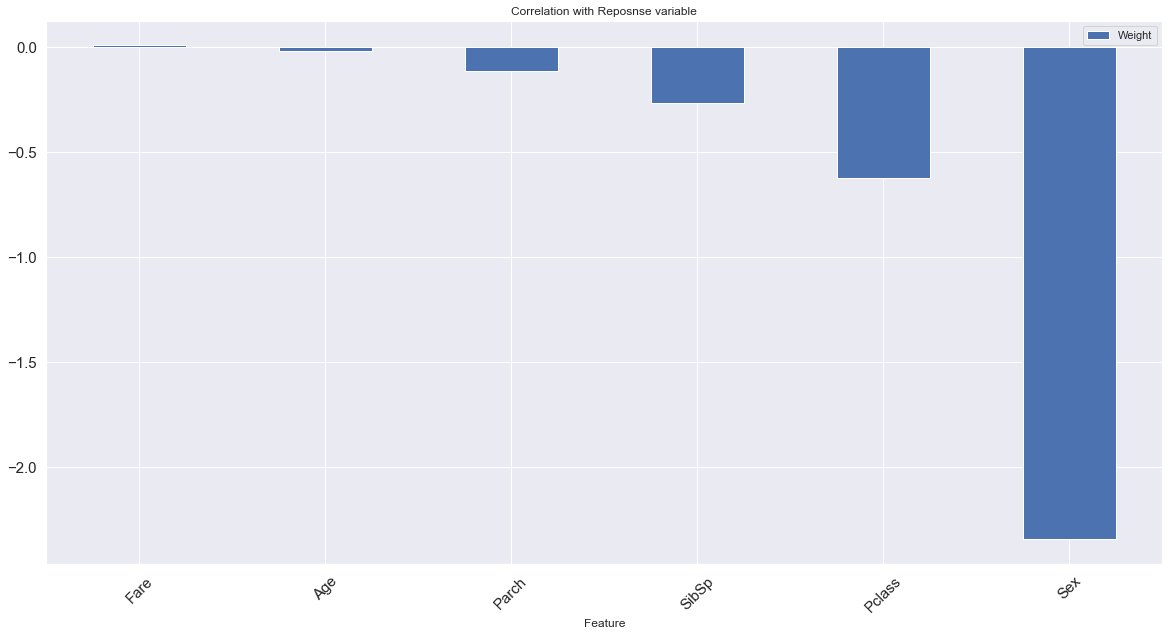

In [46]:
coeff_df.set_index('Feature').plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)